# Perceptron webinar

###  What is machine learning?
Machine learning is a field of computer science that designs **algorithms** that improve at a **task** with **experience**
* Statistical Modeling: The Two Cultures: https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726

## Perceptron classifier

The perceptron is one of the first examples of a linear classifier. It simply tries to identify a hyperplan or in our case a line that seperates two classes. The key to the perceptron learning algorithm is the update rule $𝑤𝑖=𝑤𝑖+𝜂(𝑦−𝑜)𝑥𝑖$ which updates the weight vector anytime we misclassify a value. Another key difference of the perceptron compared to other methods you've seen is that it is a thresholded method, that is, it does not look at the actual value of the predcition but rather just the class of the prediction which can only be -1 or +1 in the perceptron setting. 

Recall: $o(x_1,x_2,...,x_n) = 1$ if $w_0 + w_1x_1+w_2x_2+...+w_nx_n > 0$ otherwise $o(x_1,x_2,...,x_n) = -1$

Let see how this update function works:
1. If we classify correctly the class of a point, then the update should be equal to 0:
Assume the true class of y is -1 then $w = w + (-1 - (-1))x_i = w + \eta*0*x_i= w+0$ All good. Try the case where the true class is +1 and you predict +1
2. If we assign the wrong class:
Assume the true class is -1 and we assign +1 then $w = w + \eta(-1 - (+1))x_i = w - 2\eta x_i$, which pushes the line towards the negative side. Try the case where the true class is +1 and we assign -1

In [60]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [61]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

## Data partitioning and model evaluation
To ensure that our model generalizes to unseen data, we need to simulate new unseen data coming into the system. To do so, we generally split the data into 3 sets and hold one out until final evaluation. For more information see:
How to evaluate and select models and why having a train/validation/test dataset are important (see chapter 7): https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print10.pdf

In [ ]:
#Commented out for Webinar but something to look
#Before we get started we need to split our data!
#train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In practice, you should use the **training** data to better understand the problebm, choose some models, and choose some baselines. The **validation** dataset should be used to fine tune the model you will choose as your final model. The **test** dataset should be used to evaluate your final model and you should report the performance on the test dataset.

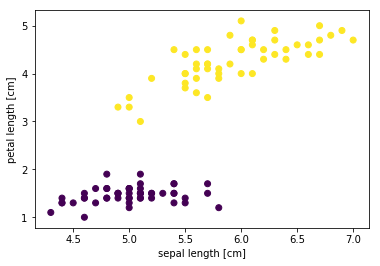

In [53]:
#let's look at the data
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

In [62]:
ppn = Perceptron(epochs=10, eta=0.01)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)

Weights: [-0.04  -0.068  0.182]


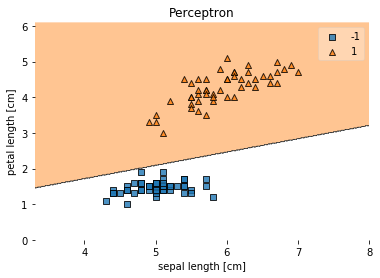

In [63]:
#let's plot
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

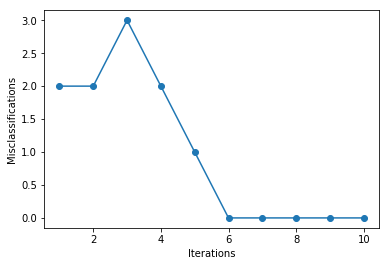

In [64]:
#plot error over time
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

## What if we use SGD instead?
Source: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

Here we are going to use the stochastic gradient desecnt update rule (also known as the 'delta rule') as mentioned in the video lectures. The algorithm still uses the same update approach to the weight vector in the perceptron learning algorithm $w_i = w_i + \eta (y - o)x_i $. There two minor differences:

1. The $o$ term in the percpetron algorithm is the result of (e.g. $o(x_1,x_2,...,x_n) = 1$ if $w_0 + w_1x_1+w_2x_2+...+w_nx_n > 0$ otherwise $o(x_1,x_2,...,x_n) = -1$), so the only possible values for $o$ are -1 or +1. In stochastic gradient descent, $o$ is the actual value of $w_0 + w_1x_1+w_2x_2+...+w_nx_n$ and can be any number not just -1 or +1 (sometimes stochastic gradient descent is referred to as 'unthresholded perceptron rule'

2. The weights are updated by using all entries in the training dataset as opposed one misclassified point at a time (which is OK since if we properly classify a point the weight update equals 0). This is why stochastic gradient descent is called 'batch'

In [125]:
#source: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
import numpy as np

class AdalineSGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):

        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)#compute the actual prediction as opposed to thresholded prediction of -1 or +1
                error = (target - output) #compute the difference between actual and predicted value
                self.w_[1:] += self.eta * xi.dot(error)
                self.w_[0] += self.eta * error

            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        print(self.w_)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [126]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

[ 0.02207307 -0.1573615   1.068999  ]


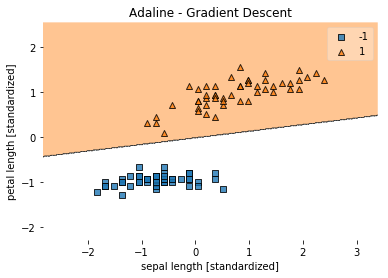

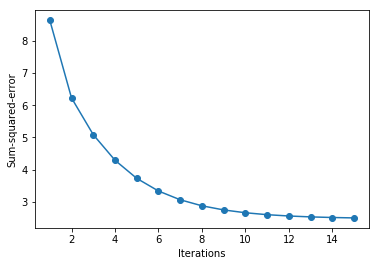

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ada = AdalineSGD(epochs=15, eta=0.01)
#print(ada.w_)

ada.train(X_std, y)
plot_decision_regions(X_std, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()


# Additional resources:
    1. Proof of convergence of Perceptron Learning Algorithm: http://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf also see: Minsky and Papert (1969)
    2. Interactive neural network playground (set it to a single layer to be equivalent to a perceptron with SDG): https://playground.tensorflow.org
    3. Intuition for the PLA update rule: https://stackoverflow.com/questions/34477827/intuition-for-perceptron-weight-update-rule
    4. Interactive example of PLA with code: https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/
    5. Increasingly complex networks example: http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
    6. A project that looks at the effect of different learning rates: https://nbviewer.jupyter.org/gist/jaredly/8630326/Perceptron.ipynb
    7. Learning from Date: A short course (slides used: http://work.caltech.edu/slides/slides01.pdf)
    8. Machine Learning by Tom Mitchell (Chapter 4 Artificial Neural Netrworks)
    9. Difference between perceptron update and gradient descent update: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
    10. Another implementation using SGD: https://jtsulliv.github.io/perceptron/
    11. Statistical Modeling: The Two Cultures by Leo Breiman https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726
    12. How to chose error measures: http://work.caltech.edu/slides/slides04.pdf